In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [6]:
df = pd.read_csv('immo_data_final.csv')
print(df.dtypes)

Unnamed: 0             int64
Id                     int64
Locality              object
Type                  object
SubType               object
Price                  int64
Bedrooms               int64
Living_Area            int64
Is_Equiped_Kitchen     int64
Is_Furnished           int64
Is_Open_Fire           int64
Terrace                int64
Terrace_Area           int64
Garden                 int64
Garden_Area            int64
Land_Surface           int64
State                  int64
Facades                int64
Swim_pool              int64
Muniplicity           object
Region                object
Surface_total          int64
dtype: object


C:\Users\T570\AppData\Local\Temp\ipykernel_4920\3147551569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])
C:\Users\T570\AppData\Local\Temp\ipykernel_4920\3147551569.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value_Score'] = (
C:\Users\T570\AppData\Local\Temp\ipykernel_4920\3147551569.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

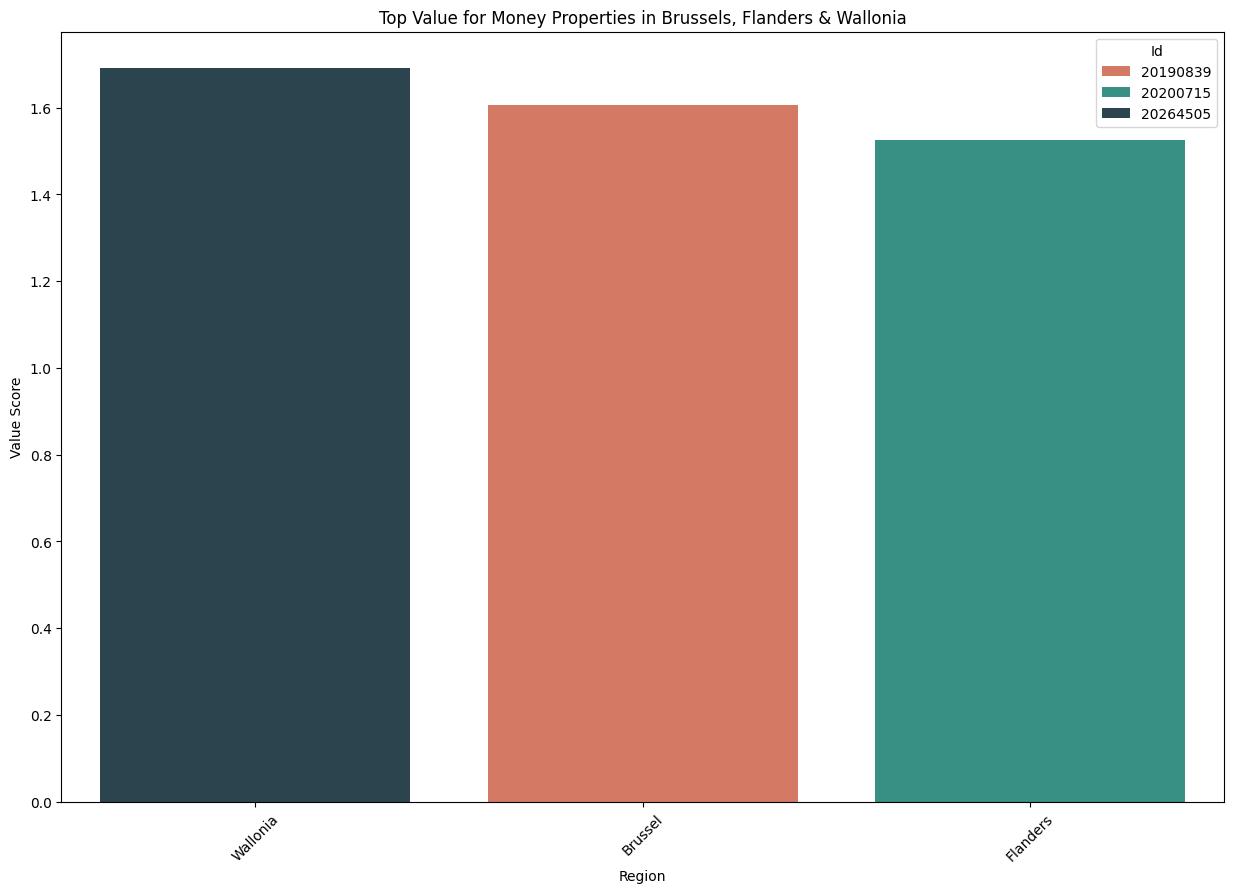

In [14]:
#Filter by Region
flanders_properties = df[df['Region'] == 'Flanders']
wallonia_properties = df[df['Region'] == 'Wallonia']
brussels_properties = df[df['Region'] == 'Brussel']


def calculate_value_score(df):
    # Normalize and calculate value
    scaler = MinMaxScaler()
    numerical_features = ["Price", "Living_Area", "Land_Surface", "Terrace_Area", "Garden_Area"]
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # Define weights of features
    weights = {
        'Price': -0.4,
        'Living_Area': 0.3,
        'Land_Surface': 0.2,
        'Is_Equiped_Kitchen': 0.1,
        'Is_Furnished': 0.05,
        'Is_Open_Fire': 0.05,
        'Terrace': 0.05,
        'Garden': 0.1,
        'Swim_pool': 0.1,
        'State': 0.2
    }

    # Calculate the score
    df['Value_Score'] = (
        df['Price'] * weights['Price'] +
        df['Living_Area'] * weights['Living_Area'] +
        df['Land_Surface'] * weights['Land_Surface'] +
        df['Is_Equiped_Kitchen'] * weights['Is_Equiped_Kitchen'] +
        df['Is_Furnished'] * weights['Is_Furnished'] +
        df['Is_Open_Fire'] * weights['Is_Open_Fire'] +
        df['Terrace'] * weights['Terrace'] +
        df['Garden'] * weights['Garden'] +
        df['Swim_pool'] * weights['Swim_pool'] +
        df['State'] * weights['State']
    )

    return df

# calculate score for each region
flanders_properties = calculate_value_score(flanders_properties)
wallonia_properties = calculate_value_score(wallonia_properties)
brussels_properties = calculate_value_score(brussels_properties)

# Get the top 3 properties for each region
top_flanders = flanders_properties.nlargest(1, 'Value_Score')
top_wallonia = wallonia_properties.nlargest(1, 'Value_Score')
top_brussels = brussels_properties.nlargest(1, 'Value_Score')

plt.figure(figsize = (15, 10))

top_properties = pd.concat([top_flanders, top_wallonia, top_brussels])
top_properties = top_properties.sort_values(by='Value_Score', ascending=False)

colour_pallette = ['#E76F51','#2A9D8F', '#264653']

sns.barplot(x='Region', y='Value_Score', hue='Id', data=top_properties, palette=colour_pallette[:len(top_properties)], order=top_properties['Region'])
plt.title("Top Value for Money Properties in Brussels, Flanders & Wallonia")
plt.xlabel("Region")
plt.ylabel("Value Score")
plt.xticks(rotation=45)
plt.show()

## Top 3 Properties

- Flanders: https://www.immoweb.be/en/classified/apartment/for-sale/saint-gilles/1060/20200715
- Wallonia: https://www.immoweb.be/en/classified/apartment/for-sale/saint-gilles/1060/20264505
- Brussels: https://www.immoweb.be/en/classified/apartment/for-sale/saint-gilles/1060/20190839